In [1]:
# import module
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
# Load Data
data = pd.read_excel('../Downloads/18221154.xlsx')

In [3]:
# Preview 5 rows pertama dari dataset
data.head()

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Pria,20.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bogor,500%,Tidak,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pria,24.0,D3,Pegawai Negeri,Rp 2 juta – Rp 5 juta,Tangerang,500%,Tidak,NaN,Mobile Banking,...,Transfer via ATM,Kartu Kredit / Debit Online,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
2,Wanita,19.0,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,Bandung,700%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jumlah barang yang diterima kurang,NaN,NaN
3,Wanita,35.0,S1,Ibu Rumah Tangga,< Rp 2 juta,Sumatera Barat,1000%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
4,Pria,19.0,SMA,Pelajar / Mahasiswa,> Rp 10 juta,Surabaya,500%,Tidak,NaN,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,Melalui minimarket,menggunakan fitur Paylater,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,Jumlah barang yang diterima kurang,NaN,Saldo eMoney/ eWallet berkurang tanpa melakuka...


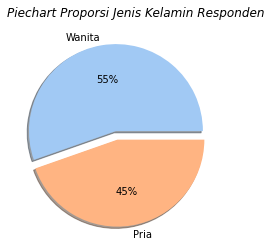

In [4]:
# Pie chart proporsi jenis kelamin responden
gender = data['Jenis Kelamin'].value_counts().reset_index()
gender.columns = ['Jenis Kelamin', 'Frekuensi']
pallete = sns.color_palette('pastel')
explode = (0,0.1)
plt.pie(gender['Frekuensi'], labels = gender['Jenis Kelamin'],colors = pallete, explode = explode, autopct = '%.0f%%', shadow = True)
plt.title(label="Piechart Proporsi Jenis Kelamin Responden", loc="left", fontstyle='italic')
plt.show()

In [5]:
# Tabel frekuensi gender
gender['Proporsi'] = (gender['Frekuensi']/gender['Frekuensi'].sum())
gender

,Jenis Kelamin,Frekuensi,Proporsi
0,Wanita,165,0.553691
1,Pria,133,0.446309


In [6]:
# Filtering data dengan Usia NaN
data[pd.isnull(data.Usia)]

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
158,Wanita,NaN,S1,Ibu Rumah Tangga,NaN,Depok,500%,Tidak,NaN,NaN,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,Jumlah barang yang diterima kurang,Pembayaran telah dilakukan tetapi tidak terdet...,NaN
178,Wanita,NaN,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,1500%,Ya,Mengikuti kelas online,NaN,...,Transfer via ATM,NaN,Melalui minimarket,NaN,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,Pembayaran sudah dilakukan; barang tidak tersedia,Jumlah barang yang diterima kurang,NaN,NaN


In [7]:
# Filtering data Usia yang anomali
data.loc[data.Usia > 100]

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
299,Wanita,1977.0,S1,Ibu Rumah Tangga,Rp 2 juta – Rp 5 juta,Bogor,200%,Tidak,NaN,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN


In [8]:
# Terdapat 1 row data Usia yang anomali dengan asumsi value tersebut 
# merupakan tahun kelahiran

In [9]:
# Convert value di kolom usia yang berupa tahun menjadi usia sekarang
def yeartoAge(row) :
    if row.Usia > 1900 :
        row.Usia = 2022 - row.Usia
        return row
    else:
        return row
# Apply fungsi yearToAge ke data
data = data.apply(yeartoAge, axis ='columns')
# Cek data yang di konversi
data.loc[299]

Jenis Kelamin                              Wanita
Usia                                         45.0
Pendidikan Terakhir                            S1
Pekerjaan                        Ibu Rumah Tangga
Penghasilan per Bulan       Rp 2 juta – Rp 5 juta
                                    ...          
keluhan_belanja_online_2                      NaN
keluhan_belanja_online_3                      NaN
keluhan_belanja_online_4                      NaN
keluhan_belanja_online_5                      NaN
keluhan_belanja_online_6                      NaN
Name: 299, Length: 150, dtype: object

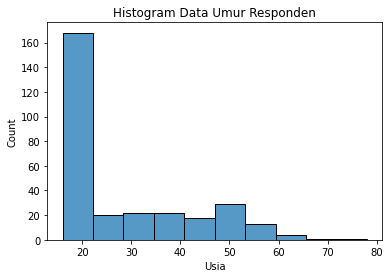

In [10]:
# Histogram Usia
sns.histplot(data = data, x = 'Usia', bins=10)
plt.title('Histogram Data Umur Responden')
plt.show()

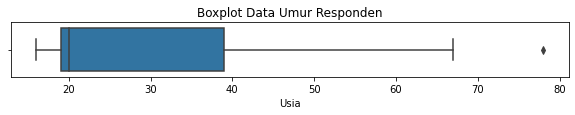

In [11]:
# Boxplot Usia
plt.figure(figsize = (10,1))
sns.boxplot(data = data, x = 'Usia')
plt.title('Boxplot Data Umur Responden')
plt.show()

In [12]:
# Menggunakan describe()
data['Usia'].describe()

count    298.000000
mean      28.912752
std       13.418131
min       16.000000
25%       19.000000
50%       20.000000
75%       39.000000
max       78.000000
Name: Usia, dtype: float64

In [13]:
# Mean
mean_usia = data.Usia.mean()
mean_usia

28.91275167785235

In [14]:
# Q1, Q2, Q3
quantile = data.Usia.quantile([0.25,0.5,0.75]).reset_index()
quantile.columns = ['Quantile','Values']
quantile.index = ['Q1','Q2','Q3']
quantile

,Quantile,Values
Q1,0.25,19.0
Q2,0.50,20.0
Q3,0.75,39.0


In [15]:
# Min, Max
min_usia = data.Usia.min()
max_usia = data.Usia.max()
dfminmax = pd.DataFrame({'Values' : [min_usia,max_usia]})
dfminmax.index = ['min','max']
dfminmax

,Values
min,16.0
max,78.0


In [16]:
# Identifikasi Q1, Q3, IQR (Q3-Q1)
q1 = quantile.iloc[0,1]
q3 = quantile.iloc[2,1]
iqr = q3 - q1
q1, q3, iqr

(19.0, 39.0, 20.0)

In [17]:
# Identifikasi range outlier
f'Outlier : <{q1 - 1.5 * iqr}, {q3 + 1.5 * iqr}>'

'Outlier : <-11.0, 69.0>'

In [18]:
# Filtering data outliers
data[(data['Usia'] < -11.0) | (data['Usia'] > 69.0)]

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
75,Wanita,78.0,Bidan,Pensiunan PNS,Rp 2 juta – Rp 5 juta,Medan,100%,Tidak,NaN,NaN,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Cleansing data outliers
indexAge = data[ (data['Usia'] < -11) | (data['Usia'] > 69) ].index
data.drop(indexAge, inplace=True)
# Filtering data outliers
data[(data['Usia'] < -11.0) | (data['Usia'] > 69.0)]

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6


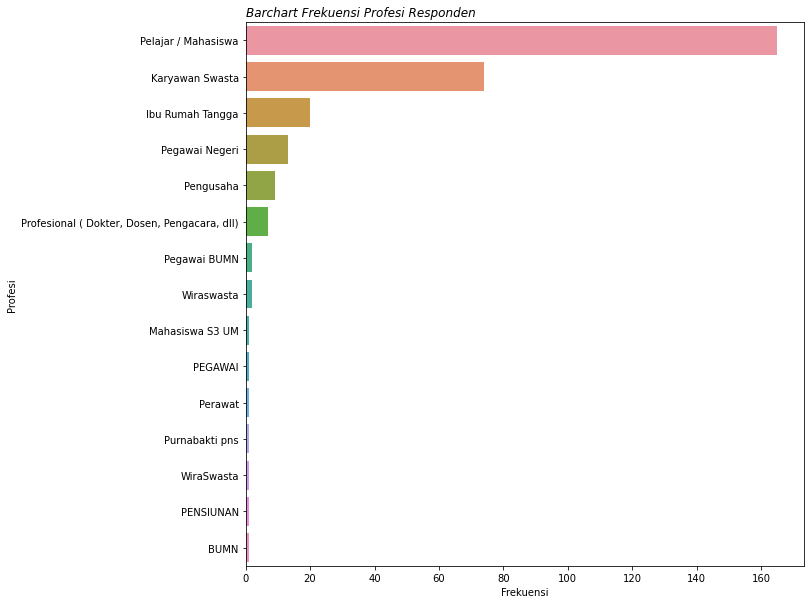

In [20]:
# Barchart frekuensi profesi responden
plt.figure(figsize = (10,10))
frek_profesi = data['Pekerjaan'].value_counts().reset_index()
frek_profesi.columns = ['Profesi','Frekuensi']
profesi = sns.barplot(x='Frekuensi', y='Profesi', data=frek_profesi)
plt.title(label="Barchart Frekuensi Profesi Responden", loc="left", fontstyle='italic')
plt.show()

In [21]:
# Tabel frekuensi profesi
frek_profesi['Proporsi'] = (frek_profesi['Frekuensi']/frek_profesi.Frekuensi.sum())
frek_profesi

,Profesi,Frekuensi,Proporsi
0,Pelajar / Mahasiswa,165,0.551839
1,Karyawan Swasta,74,0.247492
2,Ibu Rumah Tangga,20,0.066890
3,Pegawai Negeri,13,0.043478
4,Pengusaha,9,0.030100
5,"Profesional ( Dokter, Dosen, Pengacara, dll)",7,0.023411
6,Pegawai BUMN,2,0.006689
7,Wiraswasta,2,0.006689
8,Mahasiswa S3 UM,1,0.003344
9,PEGAWAI,1,0.003344


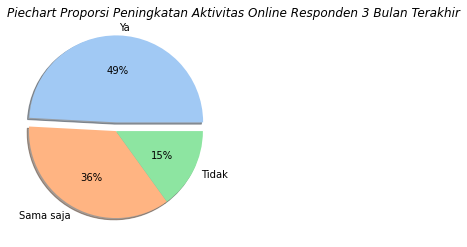

In [22]:
# Pie chart proporsi aktivitas online responden 3 bulan terakhir
aktivitas_online = data['Aktivitas Online Meningkat'].value_counts().reset_index()
aktivitas_online.columns = ['Peningkatan','Frekuensi']
pallete = sns.color_palette('pastel')
explode = (0.1,0,0)
plt.pie(aktivitas_online['Frekuensi'], labels = aktivitas_online['Peningkatan'],colors = pallete, explode = explode, autopct = '%.0f%%', shadow = True)
plt.title(label="Piechart Proporsi Peningkatan Aktivitas Online Responden 3 Bulan Terakhir", loc="left", fontstyle='italic')
plt.show()

In [23]:
# Tabel frekuensi aktivitas online responden 3 bulan terakhir
aktivitas_online['Proporsi'] = (aktivitas_online['Frekuensi']/aktivitas_online.Frekuensi.sum())
aktivitas_online

,Peningkatan,Frekuensi,Proporsi
0,Ya,147,0.491639
1,Sama saja,107,0.357860
2,Tidak,45,0.150502


In [24]:
# Preview data pengguna 7 bank
bank = data.iloc[:, 15:22]
bank

,bank_1,bank_2,bank_3,bank_4,bank_5,bank_6,bank_7
0,NaN,Bank Mandiri,NaN,NaN,NaN,NaN,NaN
1,Bank BNI,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Bank BCA,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Bank BRI,NaN,NaN
4,NaN,NaN,Bank BCA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
295,NaN,Bank Mandiri,Bank BCA,NaN,NaN,NaN,NaN
296,NaN,Bank Mandiri,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,Bank BCA,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,Bank BRI,NaN,NaN


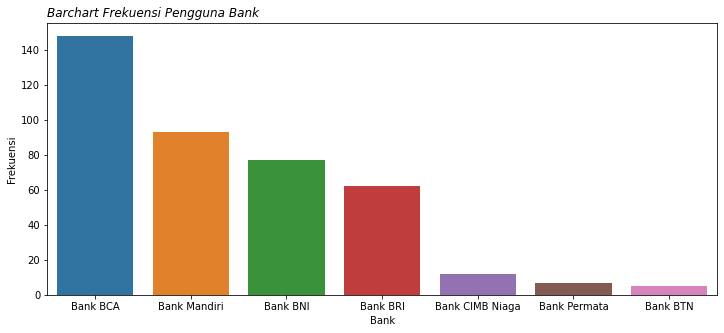

In [25]:
# Merge 7 columns bank menjadi 1
a = []
for col in bank.columns :
    a += list(data[col])

# Barchart frekuensi pengguna bank
dfbank = pd.DataFrame(pd.Series(a).value_counts()).reset_index()
dfbank.columns = ['Bank','Frekuensi']
plt.figure(figsize = (12,5))
plot_bank = sns.barplot(y='Frekuensi', x='Bank',data=dfbank)
plt.title(label="Barchart Frekuensi Pengguna Bank", loc="left", fontstyle='italic')
plt.show()

In [26]:
# Identifikasi jumlah sampel
n = len(data)
n

299

In [27]:
dfbank['Proporsi'] = (dfbank['Frekuensi']/n)
dfbank

,Bank,Frekuensi,Proporsi
0,Bank BCA,148,0.494983
1,Bank Mandiri,93,0.311037
2,Bank BNI,77,0.257525
3,Bank BRI,62,0.207358
4,Bank CIMB Niaga,12,0.040134
5,Bank Permata,7,0.023411
6,Bank BTN,5,0.016722


In [28]:
# Confidence interval pengguna bank BCA
alpha = 1 - 0.95
# Proporsi pengguna bank BCA
p_bca = dfbank['Proporsi'][0]
p_bca

0.49498327759197325

In [29]:
# Z alpha/2 bank BCA
z_alpha_per_2_bca = st.norm.ppf(1-alpha/2)
z_alpha_per_2_bca

1.959963984540054

In [30]:
# confidence interval
lb_bca = p_bca - z_alpha_per_2_bca * (p_bca * (1 - p_bca)/n)**0.5
ub_bca = p_bca + z_alpha_per_2_bca * (p_bca * (1 - p_bca)/n)**0.5

f'confidence interval : {lb_bca} < Pbca < {ub_bca}'

'confidence interval : 0.43831230842224134 < Pbca < 0.5516542467617052'

In [31]:
# Uji hipotesis (BCA)
# H0 : Pbca = 0.5
# H1 : Pbca != 0.5
# a = 5%
p0_bca = 0.5
# Z BCA
Z_bca = (n*p_bca - n*p0_bca) / ((n*p0_bca*(1-p0_bca))**0.5)
Z_bca

-0.17349447958987207

In [32]:
# Kesimpulan uji hipotesis
bool_bca = (Z_bca < (-z_alpha_per_2_bca)) | (Z_bca > z_alpha_per_2_bca)
print(f'Crit Region: Z < -{z_alpha_per_2_bca:.2f}, Z > {z_alpha_per_2_bca:.2f}')
if bool_bca :
    print("Kesimpulan: Z di dalam crit region, H0 di tolak ")
else :
    print("Kesimpulan: Z di luar crit regoin, H0 gagal di tolak")

Crit Region: Z < -1.96, Z > 1.96
Kesimpulan: Z di luar crit regoin, H0 gagal di tolak


In [33]:
# P value uji hipotesis 2 arah
pvalue_bca = 2*(1-st.norm.cdf(abs(Z_bca)))
pvalue_bca

0.8622627667345217

In [34]:
# Frekuensi preferensi channel transfer antar bank
# Preview data
data.iloc[:,30]

0      Internet Banking
1        Mobile Banking
2        Mobile Banking
3        Mobile Banking
4        Mobile Banking
             ...       
295      Mobile Banking
296      Mobile Banking
297      Mobile Banking
298      Mobile Banking
299      Mobile Banking
Name: 19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank], Length: 299, dtype: object

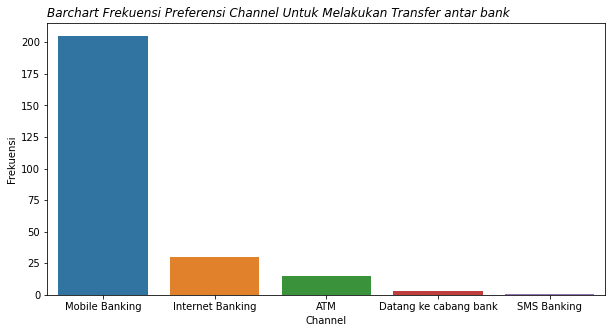

In [35]:
# Barchart frekuensi prefensi channel untuk melakukan Transfer antar bank
tf_antar_bank = data.iloc[:,30].value_counts().reset_index()
tf_antar_bank.columns = ['Channel','Frekuensi']
plt.figure(figsize = (10,5))
sns.barplot(y='Frekuensi', x='Channel', data=tf_antar_bank)
plt.title(label="Barchart Frekuensi Preferensi Channel Untuk Melakukan Transfer antar bank", loc="left", fontstyle='italic')
plt.show()

In [36]:
# Tabel frekuensi preferensi channel untuk melakukan Transfer antar bank
tf_antar_bank['Proporsi'] = (tf_antar_bank['Frekuensi']/tf_antar_bank.Frekuensi.sum())
tf_antar_bank

,Channel,Frekuensi,Proporsi
0,Mobile Banking,205,0.807087
1,Internet Banking,30,0.118110
2,ATM,15,0.059055
3,Datang ke cabang bank,3,0.011811
4,SMS Banking,1,0.003937


In [37]:
# Preview data pengguna 7 emoney
emoney = data.iloc[:, 37:44]
emoney

,emoney_pilihan_1,emoney_pilihan_2,emoney_pilihan_3,emoney_pilihan_4,emoney_pilihan_5,emoney_pilihan_6,emoney_pilihan_7
0,GoPay,ShopeePay,OVO,NaN,NaN,NaN,NaN
1,GoPay,ShopeePay,NaN,NaN,eMoney Mandiri,NaN,LinkAja
2,GoPay,ShopeePay,OVO,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
295,GoPay,ShopeePay,NaN,NaN,eMoney Mandiri,NaN,NaN
296,GoPay,ShopeePay,OVO,NaN,NaN,NaN,NaN
297,GoPay,ShopeePay,OVO,NaN,NaN,NaN,NaN
298,GoPay,ShopeePay,OVO,Dana,NaN,NaN,LinkAja


In [38]:
# Preview data responden yang tidak menggunakan emoney
nonemoney = data.iloc[:,44]
nonemoney

0                           NaN
1                           NaN
2                           NaN
3      Tidak Menggunakan eMoney
4      Tidak Menggunakan eMoney
                 ...           
295                         NaN
296                         NaN
297                         NaN
298                         NaN
299                         NaN
Name: emoney_pilihan_8, Length: 299, dtype: object

In [39]:
# Banyak pengguna tidak menggunakan emoney
n_non_emoney = nonemoney.count()
n_non_emoney

25

In [40]:
# Banyak sampel pengguna emoney 
n_emoney = n - n_non_emoney
n_emoney

274

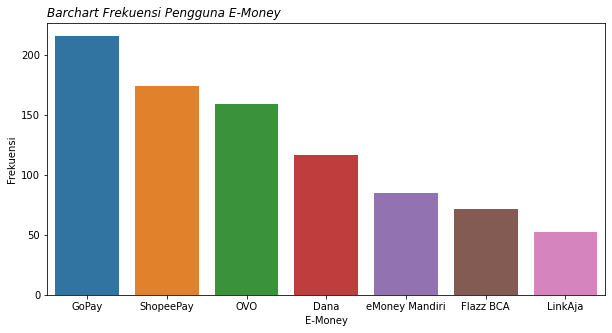

In [41]:
# Merge 7 columns emoney menjadi 1
b = []
for col in emoney.columns :
    b += list(data[col])

# Barchart frekuensi pengguna emoney
dfemoney = pd.DataFrame(pd.Series(b).value_counts()).reset_index()
dfemoney.columns = ['E-Money','Frekuensi']
plt.figure(figsize = (10,5))
sns.barplot(y='Frekuensi', x='E-Money',data=dfemoney)
plt.title(label="Barchart Frekuensi Pengguna E-Money", loc="left", fontstyle='italic')
plt.show()

In [42]:
# Tabel frekuensi pengguna e-money
dfemoney['Proporsi'] = (dfemoney['Frekuensi']/n_emoney)
dfemoney

,E-Money,Frekuensi,Proporsi
0,GoPay,216,0.788321
1,ShopeePay,174,0.635036
2,OVO,159,0.580292
3,Dana,117,0.427007
4,eMoney Mandiri,85,0.310219
5,Flazz BCA,72,0.262774
6,LinkAja,52,0.189781


In [43]:
# Confidence interval pengguna GoPay dan OVO
alpha = 1 - 0.95
# Proporsi pengguna GoPay dan OVO
p_gopay = dfemoney['Proporsi'][0]
p_ovo = dfemoney['Proporsi'][2]
p_gopay, p_ovo

(0.7883211678832117, 0.5802919708029197)

In [44]:
# Z alpha/2 emoney
z_alpha_per_2_emoney = st.norm.ppf(1-alpha/2)
z_alpha_per_2_emoney

1.959963984540054

In [45]:
# Z alpha emoney
z_alpha_emoney = st.norm.ppf(1-alpha)
z_alpha_emoney

1.6448536269514722

In [46]:
# confidence interval
lb_gopay_ovo = (p_gopay-p_ovo) - z_alpha_per_2_emoney * ((p_gopay*(1-p_gopay)/n_emoney)+(p_ovo*(1-p_ovo)/n_emoney))**0.5
ub_gopay_ovo = (p_gopay-p_ovo) + z_alpha_per_2_emoney * ((p_gopay*(1-p_gopay)/n_emoney)+(p_ovo*(1-p_ovo)/n_emoney))**0.5
f'confidence interval : {lb_gopay_ovo:} < Pgopay - Povo < {ub_gopay_ovo}'

'confidence interval : 0.13217331920864503 < Pgopay - Povo < 0.28388507495193893'

In [47]:
# Uji hipotesis (GoPay dan OVO)
# H0 : Pgopay = Povo
# H1 : Pgopay > Povo
# a = 5%

# Z pgopay-povo
xgopay = p_gopay*n_emoney 
xovo = p_ovo*n_emoney
phat = (xgopay+xovo)/(n_emoney + n_emoney)
Z_gopay_ovo = (p_gopay-p_ovo)/(phat*(1-phat)*(1/n_emoney+1/n_emoney))**0.5
Z_gopay_ovo

5.2387352310275475

In [48]:
# Kesimpulan uji hipotesis
bool_gopay_ovo = Z_gopay_ovo > z_alpha_emoney
print(f'Crit Region: Z > {z_alpha_emoney:.2f}')
if bool_gopay_ovo :
    print("Kesimpulan: Z di dalam crit region, H0 di tolak ")
else :
    print("Kesimpulan: Z di luar crit regoin, H0 gagal di tolak")

Crit Region: Z > 1.64
Kesimpulan: Z di dalam crit region, H0 di tolak 


In [49]:
# P value uji hipotesis 1 arah
pvalue_gopayovo = 1-st.norm.cdf(Z_gopay_ovo)
pvalue_gopayovo

8.084040015177152e-08

In [50]:
# Preview data
data.iloc[:,70]

0      Rp 100.001 – Rp 150.000
1       Rp 50.001 – Rp 100.000
2      Rp 100.001 – Rp 150.000
3                          NaN
4                          NaN
                ...           
295     Rp 50.001 – Rp 100.000
296    Rp 150.001 – Rp 300.000
297    Rp 25.000 – Rp 50.000,-
298     Rp 50.001 – Rp 100.000
299    Rp 100.001 – Rp 150.000
Name: 39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?, Length: 299, dtype: object

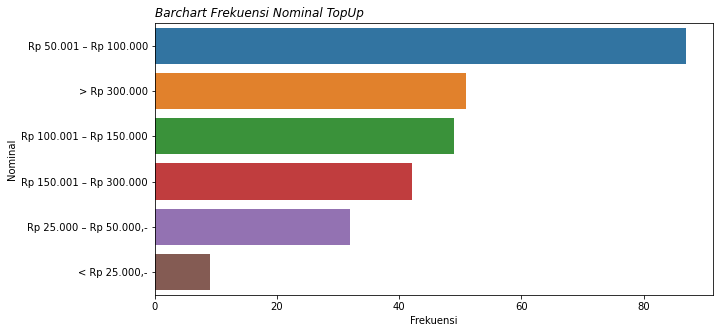

In [51]:
# Barchart frekuensi nominal melakukan topup e-money
topup = data.iloc[:,70].value_counts().reset_index()
topup.columns = ['Nominal','Frekuensi']
plt.figure(figsize = (10,5))
sns.barplot(x='Frekuensi', y='Nominal', data=topup)
plt.title(label="Barchart Frekuensi Nominal TopUp", loc="left", fontstyle='italic')
plt.show()

In [52]:
# Tabel frekuensi nominal topup
topup['Proporsi'] = topup.Frekuensi/topup.Frekuensi.sum()
topup

,Nominal,Frekuensi,Proporsi
0,Rp 50.001 – Rp 100.000,87,0.322222
1,> Rp 300.000,51,0.188889
2,Rp 100.001 – Rp 150.000,49,0.181481
3,Rp 150.001 – Rp 300.000,42,0.155556
4,"Rp 25.000 – Rp 50.000,-",32,0.118519
5,"< Rp 25.000,-",9,0.033333


In [53]:
# Preview data 7 ecommerce
ecommerce = data.iloc[:,116:123]
ecommerce

,ecommerce_pilihan_1,ecommerce_pilihan_2,ecommerce_pilihan_3,ecommerce_pilihan_4,ecommerce_pilihan_5,ecommerce_pilihan_6,ecommerce_pilihan_7
0,Shopee,Gojek (GoFood,Tokopedia,NaN,NaN,NaN,NaN
1,NaN,Gojek (GoFood,NaN,Grab (GrabFood,NaN,NaN,Tiket.com
2,Shopee,Gojek (GoFood,NaN,Grab (GrabFood,NaN,NaN,NaN
3,Shopee,NaN,NaN,NaN,NaN,Lazada,Tiket.com
4,NaN,NaN,Tokopedia,NaN,NaN,NaN,Tiket.com
...,...,...,...,...,...,...,...
295,Shopee,Gojek (GoFood,Tokopedia,NaN,NaN,NaN,NaN
296,Shopee,Gojek (GoFood,Tokopedia,NaN,NaN,NaN,NaN
297,Shopee,Gojek (GoFood,Tokopedia,NaN,NaN,NaN,NaN
298,Shopee,Gojek (GoFood,Tokopedia,NaN,NaN,NaN,NaN


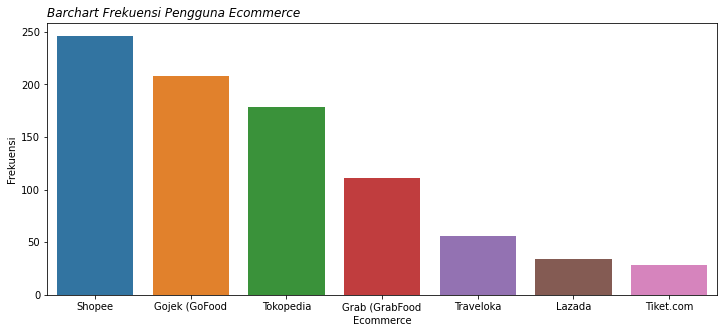

In [54]:
# Merge 7 columns ecommerce menjadi 1
c = []
for col in ecommerce.columns :
    c += list(data[col])

# Barchart frekuensi pengguna bank
dfecom = pd.DataFrame(pd.Series(c).value_counts()).reset_index()
dfecom.columns = ['Ecommerce','Frekuensi']
plt.figure(figsize = (12,5))
sns.barplot(y='Frekuensi', x='Ecommerce',data=dfecom)
plt.title(label="Barchart Frekuensi Pengguna Ecommerce", loc="left", fontstyle='italic')
plt.show()

In [55]:
# Tabel frekuensi pengguna e-commerce
dfecom['Proporsi'] = (dfecom['Frekuensi']/n)
dfecom

,Ecommerce,Frekuensi,Proporsi
0,Shopee,246,0.822742
1,Gojek (GoFood,208,0.695652
2,Tokopedia,178,0.595318
3,Grab (GrabFood,111,0.371237
4,Traveloka,56,0.187291
5,Lazada,34,0.113712
6,Tiket.com,28,0.093645


In [56]:
# Preview data
data.iloc[:,99]

0      offline/ langsung datang ke toko fisik
1      offline/ langsung datang ke toko fisik
2      offline/ langsung datang ke toko fisik
3      offline/ langsung datang ke toko fisik
4      offline/ langsung datang ke toko fisik
                        ...                  
295    offline/ langsung datang ke toko fisik
296    offline/ langsung datang ke toko fisik
297                                    online
298    offline/ langsung datang ke toko fisik
299    offline/ langsung datang ke toko fisik
Name: 47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone], Length: 299, dtype: object

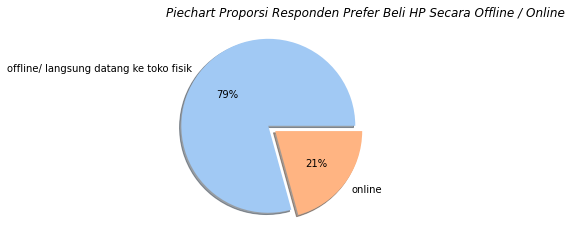

In [57]:
# Piechart proporsi responden yang prefer membeli handphone secara offline vs online
hp = data.iloc[:,99].value_counts().reset_index()
hp.columns = ['Offline/Online','Frekuensi']
pallete = sns.color_palette('pastel')
explode = (0.1,0)
plt.pie(hp['Frekuensi'], labels = hp['Offline/Online'],colors = pallete, explode = explode, autopct = '%.0f%%', shadow = True)
plt.title(label="Piechart Proporsi Responden Prefer Beli HP Secara Offline / Online", loc="left", fontstyle='italic')
plt.show()

In [58]:
# Tabel frekuensi preferensi beli HP
hp['Proporsi'] = hp.Frekuensi/hp.Frekuensi.sum()
hp

,Offline/Online,Frekuensi,Proporsi
0,offline/ langsung datang ke toko fisik,218,0.792727
1,online,57,0.207273


In [59]:
# Preview data
data.iloc[:,128]

0                                          ShopeeFood
1                                            GrabFood
2                                          ShopeeFood
3                                              GoFood
4                                          ShopeeFood
                            ...                      
295                                        ShopeeFood
296                                            GoFood
297                                            GoFood
298                                            GoFood
299    Tidak pernah menggunakan layanan Food Delivery
Name: 50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?, Length: 299, dtype: object

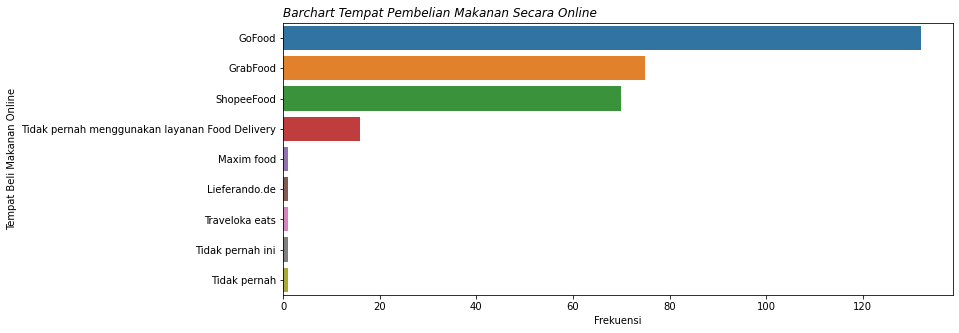

In [60]:
# Barchart tempat beli makanan online pilihan responden
food = data.iloc[:,128].value_counts().reset_index()
food.columns = ['Tempat Beli Makanan Online','Frekuensi']
plt.figure(figsize = (12,5))
sns.barplot(x='Frekuensi', y='Tempat Beli Makanan Online',data=food)
plt.title(label="Barchart Tempat Pembelian Makanan Secara Online", loc="left", fontstyle='italic')
plt.show()

In [61]:
# Tabel frekuensi tempat beli makanan online
food['Proporsi'] = food.Frekuensi/food.Frekuensi.sum()
food

,Tempat Beli Makanan Online,Frekuensi,Proporsi
0,GoFood,132,0.442953
1,GrabFood,75,0.251678
2,ShopeeFood,70,0.234899
3,Tidak pernah menggunakan layanan Food Delivery,16,0.053691
4,Maxim food,1,0.003356
5,Lieferando.de,1,0.003356
6,Traveloka eats,1,0.003356
7,Tidak pernah ini,1,0.003356
8,Tidak pernah,1,0.003356


In [62]:
# One way ANOVA
# H0 : Mean umur pengguna gofood = mean umur pengguna grabfood = mean umur pengguna shopeefood
# H1 : Setidaknya ada dua grup yang memiliki mean umur yang berbeda
# a = 5%

In [63]:
# Select data dengan kolom usia dan tempat beli makanan online pilihan responden
data2 = data.iloc[:,[1,128]]
data2.columns = ['usia','tempat_makan']

# Select hanya pengguna gofood, grabfood, shopeefood
data3 = data2.loc[data2.tempat_makan.isin(['ShopeeFood','GrabFood','GoFood'])]

In [64]:
# Cek data NaN
data3[pd.isnull(data3.usia)]

,usia,tempat_makan
158,NaN,GrabFood
178,NaN,GoFood


In [65]:
# Cek data NaN
data3[pd.isnull(data3.tempat_makan)]

,usia,tempat_makan


In [66]:
# Remove row dengan value NaN
data3 = data3.dropna()

In [67]:
# Preview data yang digunakan untuk ANOVA
data3

,usia,tempat_makan
0,20.0,ShopeeFood
1,24.0,GrabFood
2,19.0,ShopeeFood
3,35.0,GoFood
4,19.0,ShopeeFood
...,...,...
294,18.0,GoFood
295,19.0,ShopeeFood
296,19.0,GoFood
297,19.0,GoFood


In [68]:
model = ols('usia ~  C(tempat_makan)',data = data3).fit()
anova_table = sm.stats.anova_lm(model, typ = 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(tempat_makan),2.0,2724.846325,1362.423163,9.414934,0.000111
Residual,272.0,39360.775493,144.708733,NaN,NaN


In [69]:
# Identifikasi crit region 
f_alpha = st.f.ppf(0.95, dfn = 2, dfd = 272)
print(f"Crit Region: f > {f_alpha:.2f}")

Crit Region: f > 3.03


In [70]:
# Kesimpulan
print("Kesimpulan: f di dalam crit region, H0 ditolak")

Kesimpulan: f di dalam crit region, H0 ditolak


In [71]:
# Identifikasi pvalue
pval = 1 - st.f.cdf(9.414934, 2, 272)
pval

0.00011129255376374214

### Insight

#### 1. Sebanyak 80% responden lebih prefer menggunakan ***mobile banking*** untuk melakukan transfer antar bank menandakan mungkin efisiensi dan efektivitas menggunakan mobile banking lebih tinggi dibanding channel lain.
#### 2. Hampir setengah responden mengalami peningkatan aktivitas online selama 3 bulan terakhir dengan proporsi 49%.
#### 3. Sebanyak 78.8% responden menggunakan *GoPay* sebagai ***E-Money*** dan kisaran nominal top up saldo ***E-Money*** dengan frekuensi terbanyak sekitar Rp 50.001 - Rp 100.000. 
#### 4. Jika dibandingkan antara pengguna ***E-Money*** dan bank dapat disimpulkan responden lebih banyak yang menggunakan ***E-Money*** ketimbang layanan dari bank, hal ini dapat dilihat dari frekuensi tertinggi masing-masing pengguna dengan frekuensi pengguna Bank BCA yaitu 148 orang sedangkan frekuensi pengguna GoPay yaitu 216 orang.
#### 5. Sebanyak 79% responden prefer belanja HP secara offline dan 21% secara online menandakan kemungkinan kebanyakan responden lebih percaya belanja HP secara offline dibanding online.